#Atividade de Frequência



*   Entregar uma implementação em Python reproduzindo os exemplos da aula lo link abaixo com dados UCI ou sintéticos com pelo menos 5 atributos 

*   https://www.youtube.com/watch?v=ua6-bzZP0pk

## 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [1]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

## 2.   *Leitura do Dataset "Wine"*

      *   Será utilizado o dataset "Wine" 
      *   O dataset será retirado de um repositório pessoal do GITHUB


In [4]:
Wine = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Wine%20UCI.csv')
 
print(Wine.head())    #print do dataset para verificação

   Label  Alcohol  Malic Acid  ...   Hue  OD280/OD315 of diluted wines  Proline
0    1.0    14.23        1.71  ...  1.04                          3.92   1065.0
1    1.0    13.20        1.78  ...  1.05                          3.40   1050.0
2    1.0    13.16        2.36  ...  1.03                          3.17   1185.0
3    1.0    14.37        1.95  ...  0.86                          3.45   1480.0
4    1.0    13.24        2.59  ...  1.04                          2.93    735.0

[5 rows x 14 columns]


    * Verificação de dados faltantes

In [5]:
Wine.isnull().values.any()

True

In [6]:
Wine.isnull().sum()

Label                           1
Alcohol                         1
Malic Acid                      1
Ash                             1
Alcalinity of ash               1
Magnesium                       1
Total phenols                   1
Flavanoids                      1
Nonflavanoid phenols            1
Proanthocyanins                 1
Color intensity                 1
Hue                             1
OD280/OD315 of diluted wines    1
Proline                         1
dtype: int64

    * Após verificar o dataset percebeu-se que existem dados faltantes e que o mesmo está em todas as colunas.
    * Será verificado quais linhas possuem esses dados faltantes

In [7]:
df1 = Wine[Wine.isna().any(axis=1)]
print(df1)

     Label  Alcohol  Malic Acid  ...  Hue  OD280/OD315 of diluted wines  Proline
178    NaN      NaN         NaN  ...  NaN                           NaN      NaN

[1 rows x 14 columns]


    * Foi verificado que a linha 178 do dataset possui somente dados faltantes, graças a isso somente deletar essa linha será suficiente.

In [8]:
Wine = Wine.drop([178], axis = 0)

print(Wine.tail())    #print do dataset para verificação

     Label  Alcohol  Malic Acid  ...   Hue  OD280/OD315 of diluted wines  Proline
173    3.0    13.71        5.65  ...  0.64                          1.74    740.0
174    3.0    13.40        3.91  ...  0.70                          1.56    750.0
175    3.0    13.27        4.28  ...  0.59                          1.56    835.0
176    3.0    13.17        2.59  ...  0.60                          1.62    840.0
177    3.0    14.13        4.10  ...  0.61                          1.60    560.0

[5 rows x 14 columns]


## 3.   Gráficos dos dados inalterados

    * Pairplot do dataset para melhor visualização das caracteristicas de correlação dos atributos

In [9]:
sns.set(font_scale = 1)
sns.pairplot(Wine, hue = "Label", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.

    * Plot da correlação dos dados

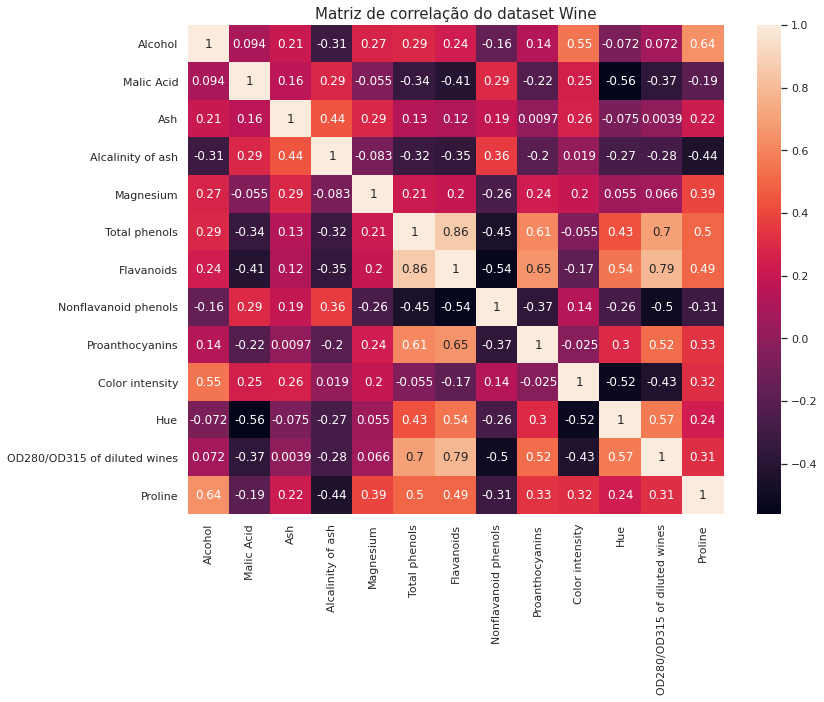

In [15]:
corrWine = Wine.iloc[:,1:].corr()
plt.figure(figsize = (12,9))
sns.set(font_scale = 1)
plt.title('Matriz de correlação do dataset Wine', fontsize = 15)
sns.heatmap(corrWine, annot=True, color = "k")

    * Plot da covariância dos dados

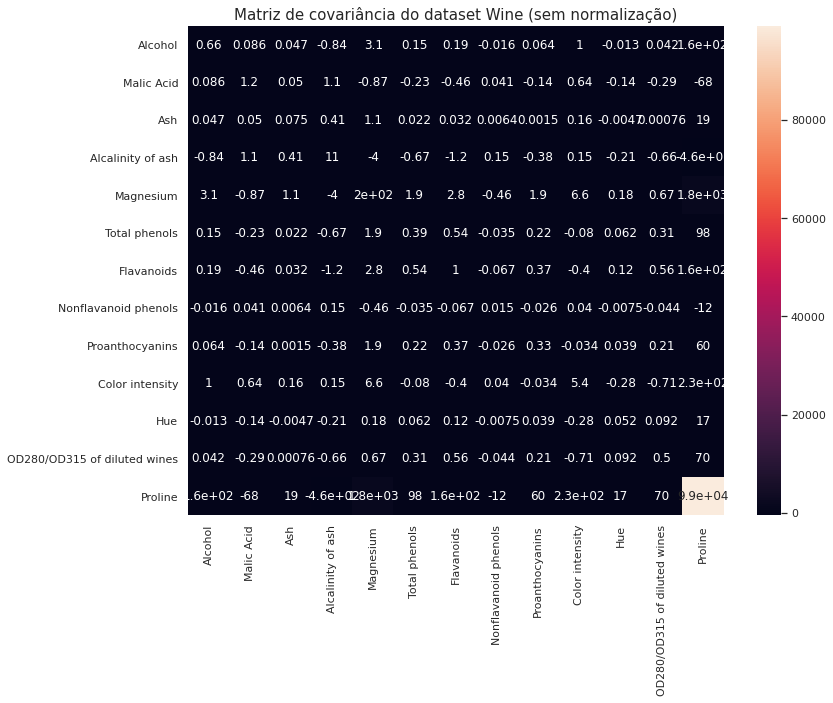

In [16]:
covWine = Wine.iloc[:,1:].cov()
plt.figure(figsize = (12,9))
sns.set(font_scale = 1)
plt.title('Matriz de covariância do dataset Wine (sem normalização)', fontsize = 15)
sns.heatmap(covWine, annot=True, color = "k")

    * Cálculo e plot dos autovalores e autovetores

In [17]:
eigenValues, eigenVectors = np.linalg.eig(covWine)

In [19]:
print(eigenValues)

[9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02]


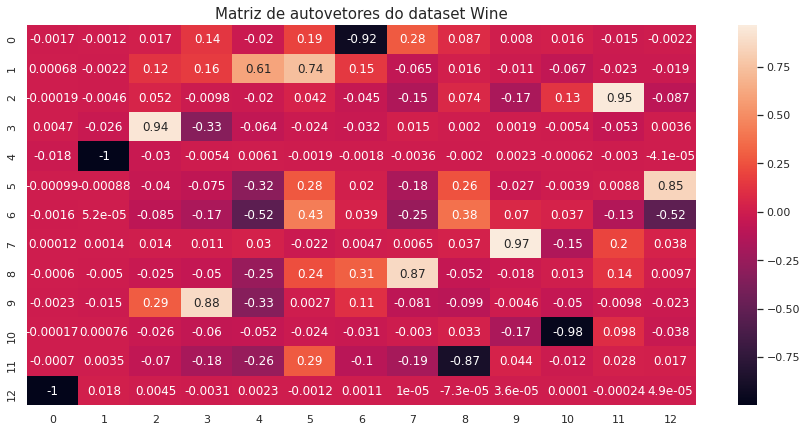

In [23]:
sns.set(font_scale = 0.3)
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
plt.title('Matriz de autovetores do dataset Wine', fontsize = 15)
sns.heatmap(eigenVectors, annot=True, color = "k")

    * Cálculo de entropia

In [24]:
print('Entropia')
H = []
for i in range(1,14):
  p, bin_edges = np.histogram(Wine.iloc[:,i], density=True)
  H.append(-sum(p*np.log2(p+1e-6)))
print(H)

Entropia
[4.293228488163717, 3.6563703421832936, 0.9475904654330009, 1.926844069171215, 0.6294331743710715, 4.251354938801015, 3.8170174774942094, -21.486344397125453, 3.675485657861797, 2.6386257676095104, -1.2626978584010655, 4.645296616590846, 0.07202994355508167]


In [25]:
p, bin_edges = np.histogram(Wine.iloc[:,1:], density=True)
print( -sum(p*np.log2(p+1e-6)) )

0.04758184601798376


## 4.   Transformação do espaço

    * Cálculo da transformação

In [26]:
transformation = Wine.copy()
transformation.iloc[:, 1:] = np.dot(Wine.iloc[:, 1:].values, eigenVectors)
print(transformation)

     Label      Alcohol  ...  OD280/OD315 of diluted wines   Proline
0      1.0 -1067.055687  ...                      0.742361  0.537742
1      1.0 -1051.590128  ...                      0.693405  0.586967
2      1.0 -1186.553841  ...                      0.891397  0.423790
3      1.0 -1481.732848  ...                      0.557583  1.164433
4      1.0  -736.921280  ...                      0.970093  0.694520
..     ...          ...  ...                           ...       ...
173    3.0  -741.512497  ...                      0.670136  0.720126
174    3.0  -751.624313  ...                      0.604711  0.792259
175    3.0  -836.950782  ...                      0.430578  0.587414
176    3.0  -841.948950  ...                      0.623219  0.691960
177    3.0  -561.549518  ...                      0.814352  0.931829

[178 rows x 14 columns]


    * Plot da correlação dos dados transformados

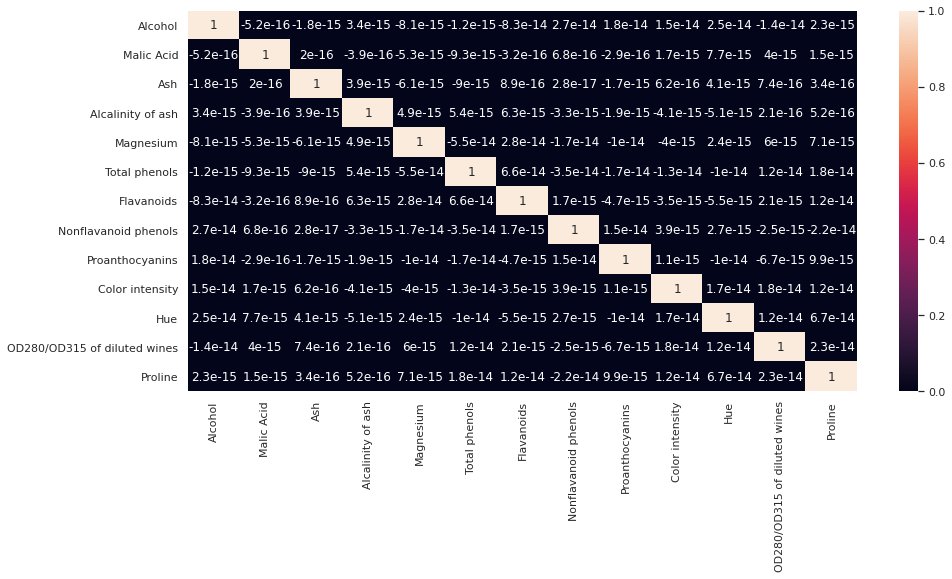

In [35]:
corrWine_Transformation = transformation.iloc[:,1:].corr()
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
sns.heatmap(corrWine_Transformation, annot=True, color = "k")

    * Plot da covariância dos dados transformados

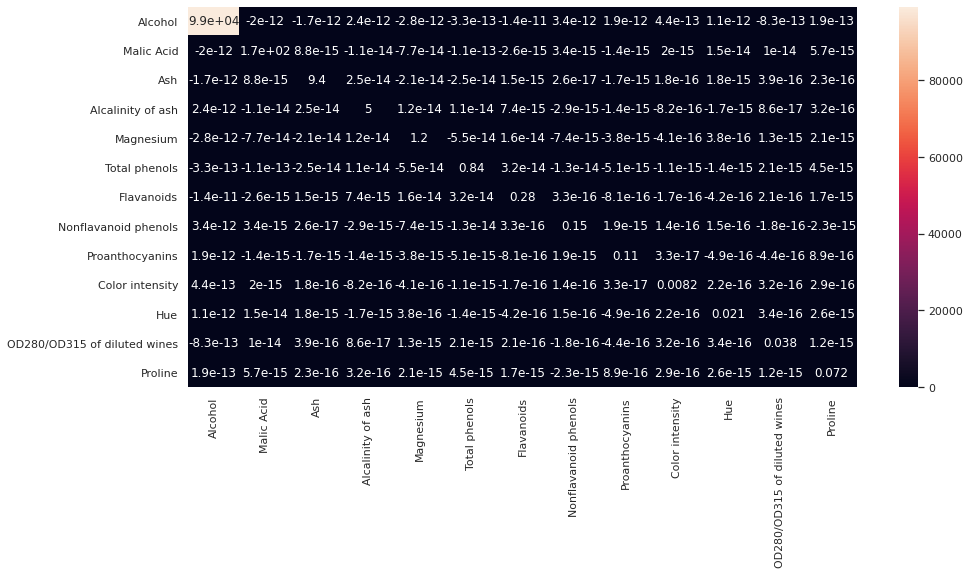

In [37]:
covWine_Transformation = transformation.iloc[:,1:].cov()
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
sns.heatmap(covWine_Transformation, annot=True, color = "k")

    * Cálculo e plot dos autovalores e autovetores

In [38]:
eigenValues_T, eigenVectors_T = np.linalg.eig(covWine_Transformation)

In [39]:
print(eigenValues_T)

[9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02]


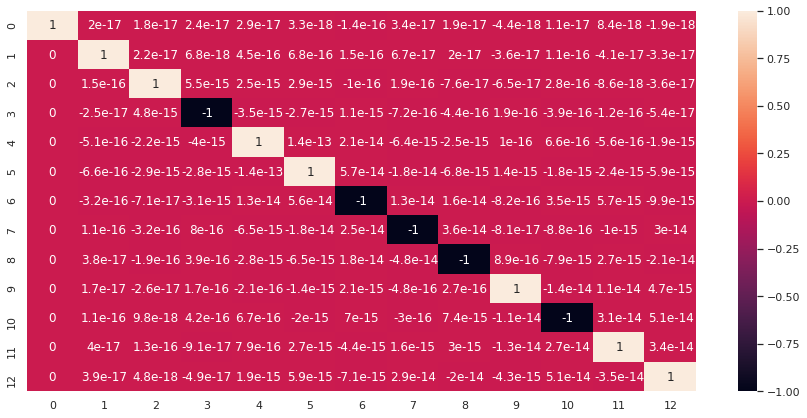

In [40]:
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
sns.heatmap(eigenVectors_T, annot=True, color = "k")

In [41]:
print(eigenValues_T/eigenValues_T.sum())

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 8.25392788e-08 2.12013755e-07 3.78060267e-07
 7.21415811e-07]


    * Cálculo de entropia da transformação

In [42]:
print('Entropia da transformação')
H_T = []
for i in range(1,14):
  p_T, bin_edges_T = np.histogram(transformation.iloc[:,i], density=True)
  H_T.append(-sum(p_T*np.log2(p_T+1e-6)))
print(H_T)

Entropia da transformação
[0.07202211562617615, 0.6439441456922541, 1.9118520075160812, 2.475982168023732, 3.0432240714954366, 3.2896608485804557, 3.2946977343842034, 2.2259562565754663, 2.5880152729238532, -24.714365577458526, -8.083030713895676, -3.484563549905157, 0.4211104413009207]


    * Pairplot dos dados transformados

In [43]:
sns.set(font_scale = 1)
sns.pairplot(transformation, hue = "Label", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.